In [12]:
import pandas as pd
import numpy as np
df = pd.read_csv("god.csv")
g_features = []
g_target = []
count = 0
count1 = 0
for i in range(len(df)):
    if df["status"][i] == 2:
        g_target.append(1)
        g_features.append([df["cataract"][i],df["other"][i]])
    elif df["status"][i] == 0 and count1 < 150:
        g_target.append(0)
        g_features.append([df["cataract"][i],df["other"][i]])
        count1 += 1
    elif df["status"][i] == 1 and count < 120:
        g_target.append(0)
        g_features.append([df["cataract"][i],df["other"][i]])
        count += 1
print(len(g_features))
g_features = np.array(g_features)
g_target = np.array(g_target)

396


Automatically created module for IPython interactive environment
accuracy_score : 0.890625
log_loss : 0.22175331644058033

accuracy_score : 0.873015873015873
log_loss : 0.24029128175323472

accuracy_score : 0.9047619047619048
log_loss : 0.24392488027848078

accuracy_score : 0.9365079365079365
log_loss : 0.17981169356191318

accuracy_score : 0.9047619047619048
log_loss : 0.1637732558747034



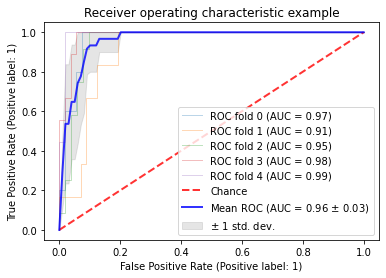

accuracy : 0.7875
              precision    recall  f1-score   support

           0       0.93      0.94      0.94        54
           1       0.67      0.60      0.63        10

    accuracy                           0.89        64
   macro avg       0.80      0.77      0.78        64
weighted avg       0.89      0.89      0.89        64

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        57
           1       0.38      0.50      0.43         6

    accuracy                           0.87        63
   macro avg       0.66      0.71      0.68        63
weighted avg       0.89      0.87      0.88        63

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        51
           1       0.71      0.83      0.77        12

    accuracy                           0.90        63
   macro avg       0.84      0.88      0.85        63
weighted avg       0.91      0.90      0.91        63

 

In [13]:
#cross-validation and plot ROC curves
print(__doc__)

import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import StratifiedKFold
#from sklearn.model_selection import StratifiedShuffleSplit

# #############################################################################
# Data IO and generation

# Import some data to play with
X = g_features
y = g_target

n_samples, n_features = X.shape


# Add noisy features
random_state = np.random.RandomState(0)


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=random_state)
# #############################################################################
# Classification and ROC analysis


# Run classifier with cross-validation and plot ROC curves

cv = StratifiedKFold(n_splits=5,shuffle=True)
#cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2)
classifier = svm.SVC(probability=True)
history = []
accuracy = []
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()
for i, (train, val) in enumerate(cv.split(X_train, y_train)):
    
    X_train, X_val = X[train], X[val]
    y_train, y_val= y[train], y[val]
    classifier.fit(X_train, y_train)
    predict = classifier.predict(X_val)
    history.append(classification_report(y_val,predict))
    clf_probs = classifier.predict_proba(X_val)
    acc = accuracy_score(y_val, predict)
    accuracy.append(acc)
    loss = log_loss(y_val, clf_probs)
    print(f"accuracy_score : {acc}")
    print(f"log_loss : {loss}\n")
    viz = plot_roc_curve(classifier, X[val], y[val],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.savefig('Graph/svm_other_graph.jpg')
plt.show()
predict = classifier.predict(X_test)
print(f"accuracy : {accuracy_score(y_test, predict)}")

for i in range(len(history)):
    print(history[i])

              precision    recall  f1-score   support

           0       0.76      0.98      0.86        53
           1       0.92      0.41      0.56        27

    accuracy                           0.79        80
   macro avg       0.84      0.69      0.71        80
weighted avg       0.82      0.79      0.76        80

0.7875


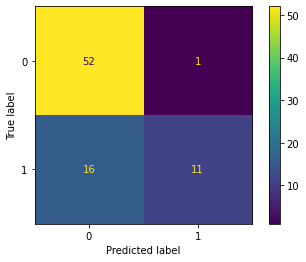

In [14]:
from sklearn.metrics import plot_confusion_matrix

#report
predict = classifier.predict(X_test)
print(classification_report(y_test,predict))
print(accuracy_score(y_test, predict))

#plot cofusion matrix
plot_confusion_matrix(classifier, X_test, y_test)
plt.savefig('Matrix/svm_other_confusion_matrix.jpg')

Automatically created module for IPython interactive environment
accuracy_score : 0.859375
log_loss : 2.3047783906330133

accuracy_score : 0.9047619047619048
log_loss : 0.14116079859718977

accuracy_score : 0.8888888888888888
log_loss : 1.2320211745154792

accuracy_score : 0.9206349206349206
log_loss : 0.670087482257288

accuracy_score : 0.9206349206349206
log_loss : 0.6773506744675606



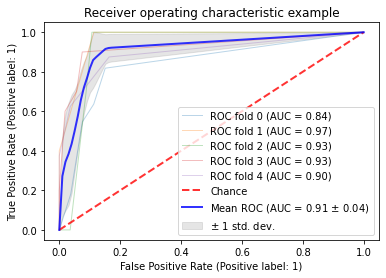

accuracy : 0.75
              precision    recall  f1-score   support

           0       0.91      0.92      0.92        53
           1       0.60      0.55      0.57        11

    accuracy                           0.86        64
   macro avg       0.75      0.73      0.74        64
weighted avg       0.85      0.86      0.86        64

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        53
           1       1.00      0.40      0.57        10

    accuracy                           0.90        63
   macro avg       0.95      0.70      0.76        63
weighted avg       0.91      0.90      0.89        63

              precision    recall  f1-score   support

           0       0.96      0.91      0.94        56
           1       0.50      0.71      0.59         7

    accuracy                           0.89        63
   macro avg       0.73      0.81      0.76        63
weighted avg       0.91      0.89      0.90        63

   

In [15]:
#cross-validation and plot ROC curves
print(__doc__)

import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
#from sklearn.model_selection import StratifiedShuffleSplit

# #############################################################################
# Data IO and generation

# Import some data to play with
X = g_features
y = g_target
X, y = X[y != 2], y[y != 2]
n_samples, n_features = X.shape


# Add noisy features
random_state = np.random.RandomState(0)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=random_state)
# #############################################################################
# Classification and ROC analysis


# Run classifier with cross-validation and plot ROC curves

cv = StratifiedKFold(n_splits=5,shuffle=True)
#cv = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=random_state)
classifier = KNeighborsClassifier(n_neighbors=4)
history = []
accuracy = []
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()
for i, (train, val) in enumerate(cv.split(X_train, y_train)):
    
    X_train, X_val = X[train], X[val]
    y_train, y_val= y[train], y[val]
    classifier.fit(X_train, y_train)
    predict = classifier.predict(X_val)
    history.append(classification_report(y_val,predict))
    clf_probs = classifier.predict_proba(X_val)
    acc = accuracy_score(y_val, predict)
    accuracy.append(acc)
    loss = log_loss(y_val, clf_probs)
    print(f"accuracy_score : {acc}")
    print(f"log_loss : {loss}\n")
    viz = plot_roc_curve(classifier, X[val], y[val],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.savefig('Graph/knn_other_graph.jpg')
plt.show()
predict = classifier.predict(X_test)
print(f"accuracy : {accuracy_score(y_test, predict)}")

for i in range(len(history)):
    print(history[i])

              precision    recall  f1-score   support

           0       0.73      0.98      0.84        53
           1       0.89      0.30      0.44        27

    accuracy                           0.75        80
   macro avg       0.81      0.64      0.64        80
weighted avg       0.79      0.75      0.71        80

0.75


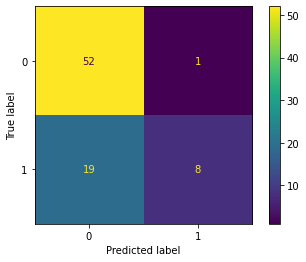

In [16]:
from sklearn.metrics import plot_confusion_matrix

#report
predict = classifier.predict(X_test)
print(classification_report(y_test,predict))
print(accuracy_score(y_test, predict))

#plot cofusion matrix
plot_confusion_matrix(classifier, X_test, y_test)
plt.savefig('Matrix/knn_other_confusion_matrix.jpg')

Automatically created module for IPython interactive environment
accuracy_score : 0.921875
log_loss : 0.17609669618724239

accuracy_score : 0.9047619047619048
log_loss : 0.2738465168163913

accuracy_score : 0.8571428571428571
log_loss : 0.5054499773505964

accuracy_score : 0.9365079365079365
log_loss : 0.20104315750615828

accuracy_score : 0.8571428571428571
log_loss : 0.30136174820753225



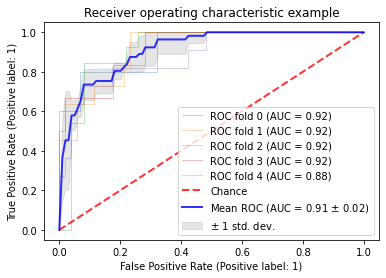

accuracy : 0.8125
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        59
           1       0.50      0.60      0.55         5

    accuracy                           0.92        64
   macro avg       0.73      0.77      0.75        64
weighted avg       0.93      0.92      0.93        64

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        52
           1       1.00      0.45      0.62        11

    accuracy                           0.90        63
   macro avg       0.95      0.73      0.79        63
weighted avg       0.91      0.90      0.89        63

              precision    recall  f1-score   support

           0       0.87      0.96      0.91        50
           1       0.75      0.46      0.57        13

    accuracy                           0.86        63
   macro avg       0.81      0.71      0.74        63
weighted avg       0.85      0.86      0.84        63

 

In [17]:
#cross-validation and plot ROC curves
print(__doc__)

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
#from sklearn.model_selection import StratifiedShuffleSplit

# #############################################################################
# Data IO and generation

# Import some data to play with
X = g_features
y = g_target
X, y = X[y != 2], y[y != 2]
n_samples, n_features = X.shape


# Add noisy features
random_state = np.random.RandomState(0)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=random_state)
# #############################################################################
# Classification and ROC analysis


# Run classifier with cross-validation and plot ROC curves

cv = StratifiedKFold(n_splits=5,shuffle=True)
#cv = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=random_state)
classifier = LogisticRegression(random_state=random_state)
history = []
accuracy = []
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()
for i, (train, val) in enumerate(cv.split(X_train, y_train)):
    
    X_train, X_val = X[train], X[val]
    y_train, y_val= y[train], y[val]
    classifier.fit(X_train, y_train)
    predict = classifier.predict(X_val)
    history.append(classification_report(y_val,predict))
    clf_probs = classifier.predict_proba(X_val)
    acc = accuracy_score(y_val, predict)
    accuracy.append(acc)
    loss = log_loss(y_val, clf_probs)
    print(f"accuracy_score : {acc}")
    print(f"log_loss : {loss}\n")
    viz = plot_roc_curve(classifier, X[val], y[val],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.savefig('Graph/lg_other_graph.jpg')
plt.show()
predict = classifier.predict(X_test)
print(f"accuracy : {accuracy_score(y_test, predict)}")

for i in range(len(history)):
    print(history[i])

              precision    recall  f1-score   support

           0       0.78      1.00      0.88        53
           1       1.00      0.44      0.62        27

    accuracy                           0.81        80
   macro avg       0.89      0.72      0.75        80
weighted avg       0.85      0.81      0.79        80

0.8125


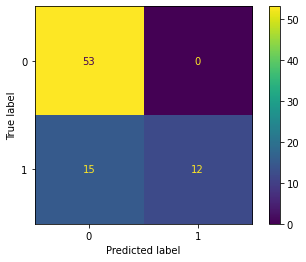

In [18]:
from sklearn.metrics import plot_confusion_matrix

#report
predict = classifier.predict(X_test)
print(classification_report(y_test,predict))
print(accuracy_score(y_test, predict))

#plot cofusion matrix
plot_confusion_matrix(classifier, X_test, y_test)
plt.savefig('Matrix/lg_other_confusion_matrix.jpg')

Automatically created module for IPython interactive environment
accuracy_score : 0.78125
log_loss : 1.0824732377121187

accuracy_score : 0.8888888888888888
log_loss : 0.30645989314995403

accuracy_score : 0.9047619047619048
log_loss : 0.67540175754405

accuracy_score : 0.873015873015873
log_loss : 0.30816246828845767

accuracy_score : 0.9365079365079365
log_loss : 0.23935908265712696



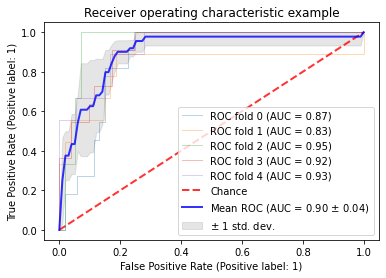

accuracy : 0.8375
              precision    recall  f1-score   support

           0       0.85      0.89      0.87        53
           1       0.33      0.27      0.30        11

    accuracy                           0.78        64
   macro avg       0.59      0.58      0.59        64
weighted avg       0.76      0.78      0.77        64

              precision    recall  f1-score   support

           0       0.90      0.98      0.94        54
           1       0.75      0.33      0.46         9

    accuracy                           0.89        63
   macro avg       0.82      0.66      0.70        63
weighted avg       0.88      0.89      0.87        63

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        57
           1       0.50      0.50      0.50         6

    accuracy                           0.90        63
   macro avg       0.72      0.72      0.72        63
weighted avg       0.90      0.90      0.90        63

 

In [19]:
#cross-validation and plot ROC curves
print(__doc__)

import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import StratifiedKFold
#from sklearn.model_selection import StratifiedShuffleSplit

# #############################################################################
# Data IO and generation

# Import some data to play with
X = g_features
y = g_target

n_samples, n_features = X.shape


# Add noisy features
random_state = np.random.RandomState(0)


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=random_state)
# #############################################################################
# Classification and ROC analysis


# Run classifier with cross-validation and plot ROC curves

cv = StratifiedKFold(n_splits=5,shuffle=True)
#cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2)
classifier = GaussianNB()
history = []
accuracy = []
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()
for i, (train, val) in enumerate(cv.split(X_train, y_train)):
    
    X_train, X_val = X[train], X[val]
    y_train, y_val= y[train], y[val]
    classifier.fit(X_train, y_train)
    predict = classifier.predict(X_val)
    history.append(classification_report(y_val,predict))
    clf_probs = classifier.predict_proba(X_val)
    acc = accuracy_score(y_val, predict)
    accuracy.append(acc)
    loss = log_loss(y_val, clf_probs)
    print(f"accuracy_score : {acc}")
    print(f"log_loss : {loss}\n")
    viz = plot_roc_curve(classifier, X[val], y[val],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.savefig('Graph/nb_other_graph.jpg')
plt.show()
predict = classifier.predict(X_test)
print(f"accuracy : {accuracy_score(y_test, predict)}")

for i in range(len(history)):
    print(history[i])

              precision    recall  f1-score   support

           0       0.81      0.98      0.89        53
           1       0.94      0.56      0.70        27

    accuracy                           0.84        80
   macro avg       0.88      0.77      0.79        80
weighted avg       0.85      0.84      0.82        80

0.8375


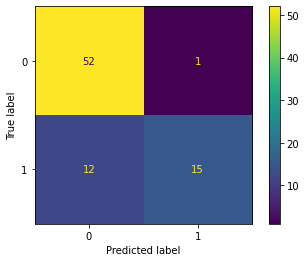

In [20]:
from sklearn.metrics import plot_confusion_matrix

#report
predict = classifier.predict(X_test)
print(classification_report(y_test,predict))
print(accuracy_score(y_test, predict))

#plot cofusion matrix
plot_confusion_matrix(classifier, X_test, y_test)
plt.savefig('Matrix/nb_other_confusion_matrix.jpg')